In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
from google.colab import files
import pandas as pd


uploaded = files.upload()

df = pd.read_csv("supply_chain_data.csv")
df.head()


Saving supply_chain_data.csv to supply_chain_data.csv


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
file_name = next(iter(uploaded))
df = pd.read_csv("supply_chain_data.csv")

In [ ]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [ ]:
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

In [ ]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.dropna(how='all', inplace=True)

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
plt.style.use('seaborn-v0_8')
sns.set_palette("coolwarm")

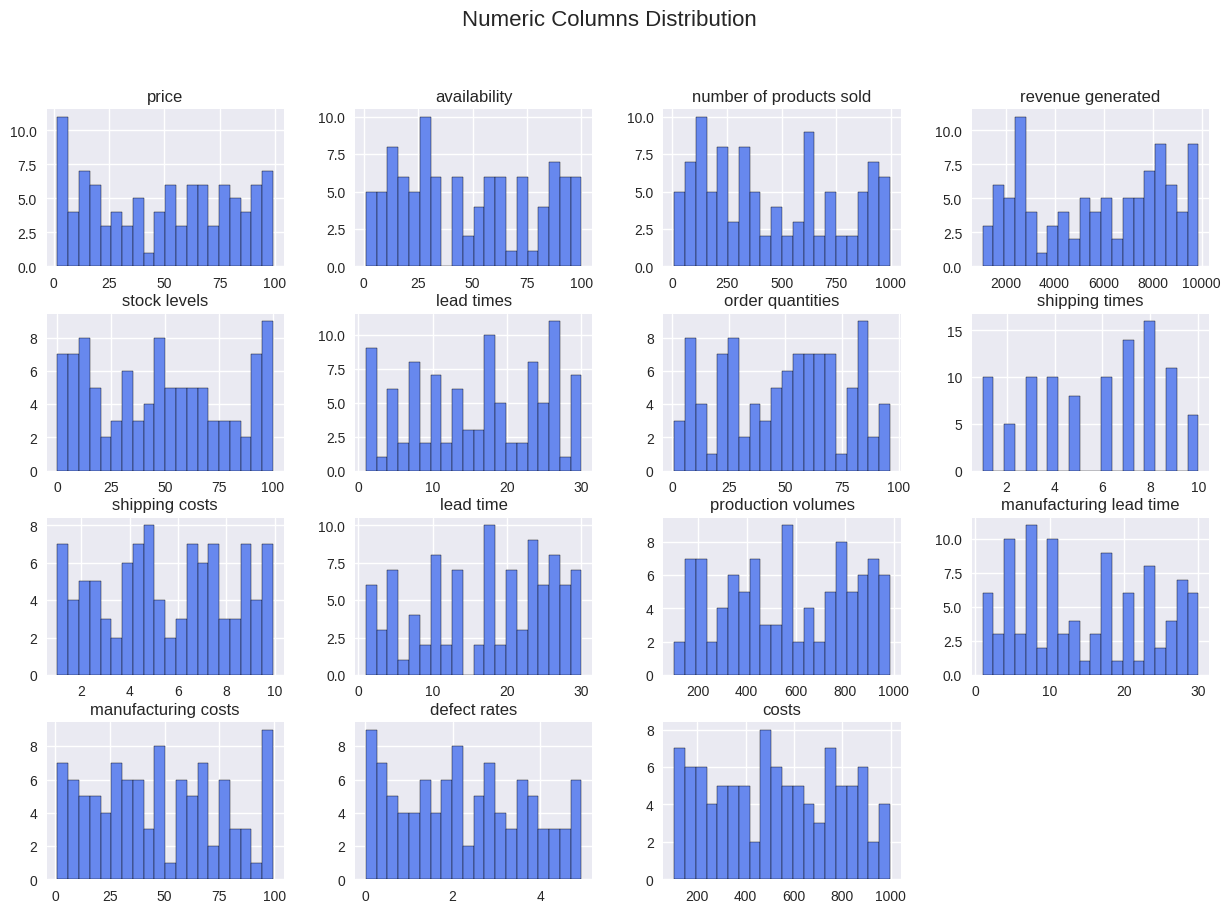

In [ ]:
df[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Numeric Columns Distribution", fontsize=16)
plt.show()

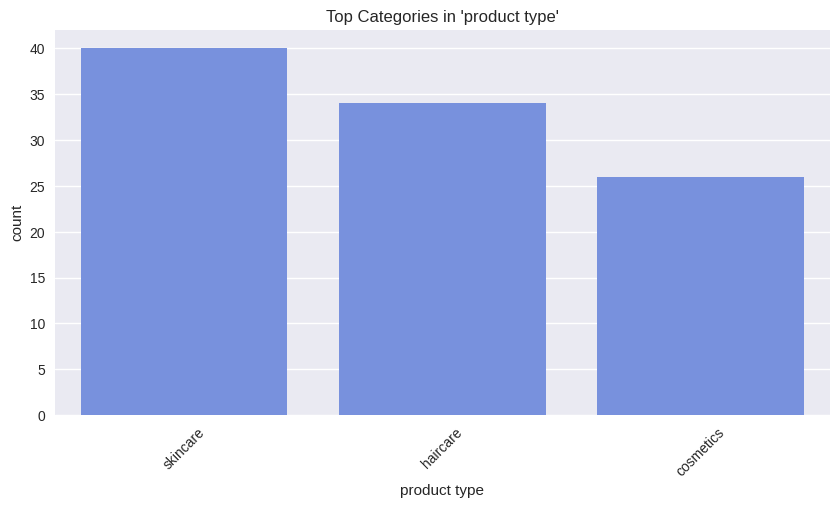

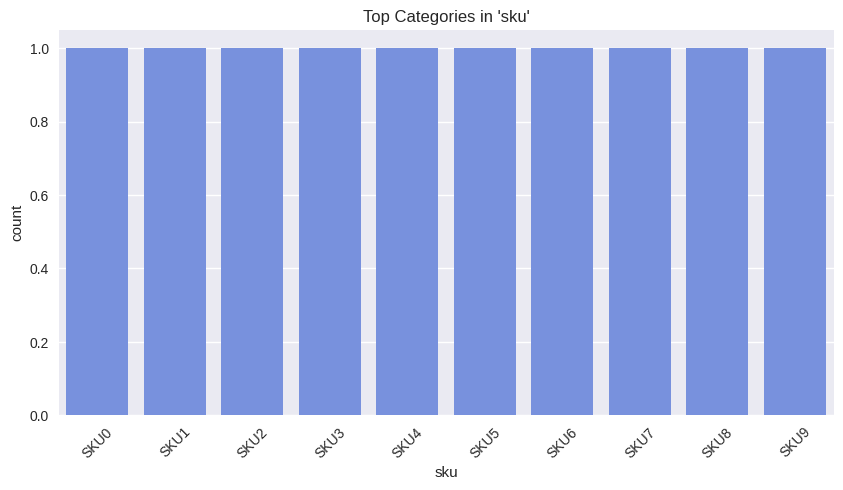

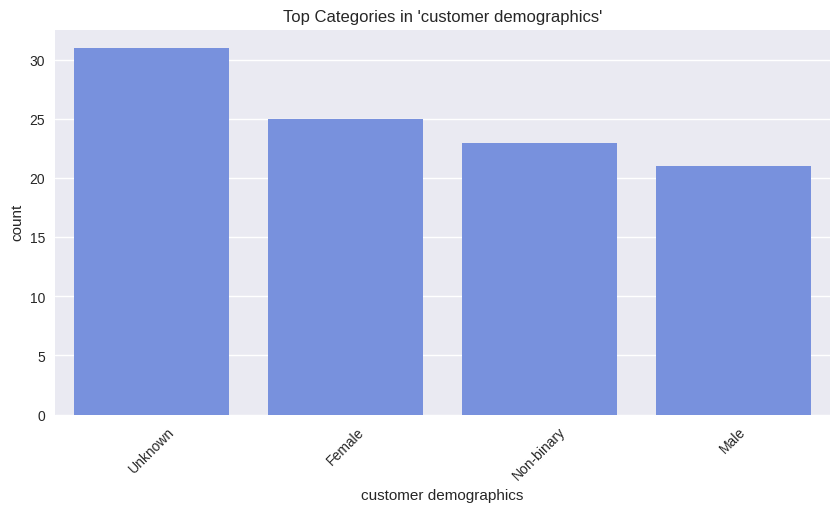

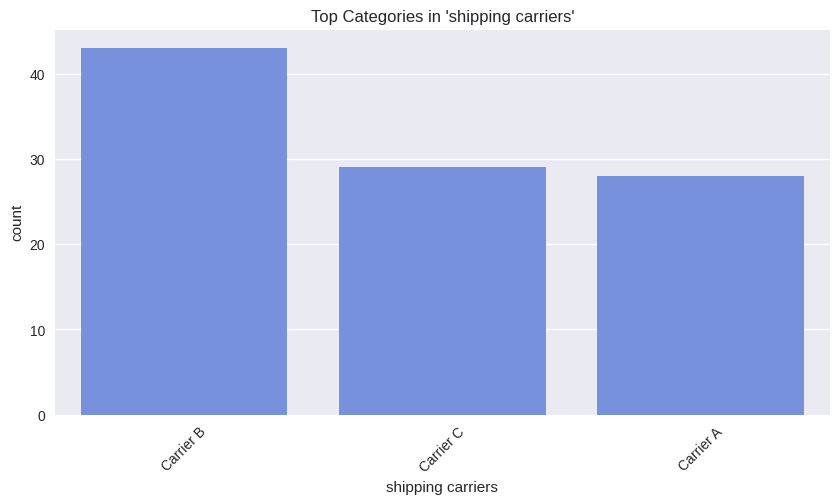

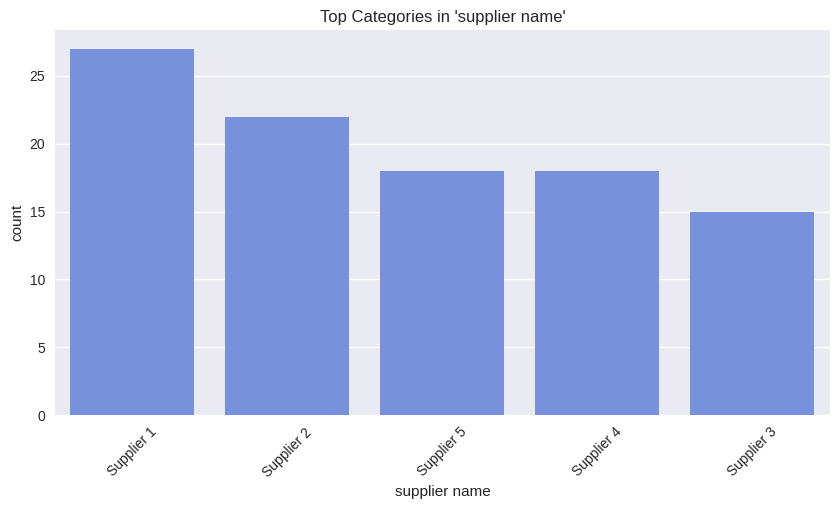

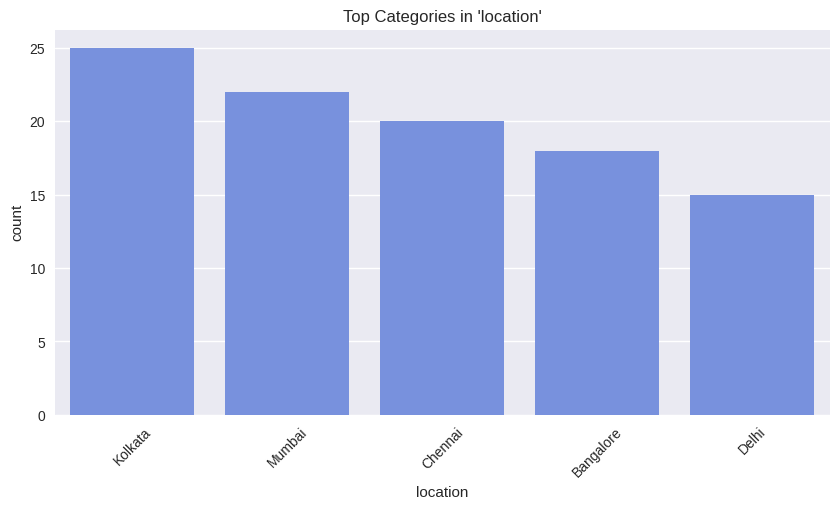

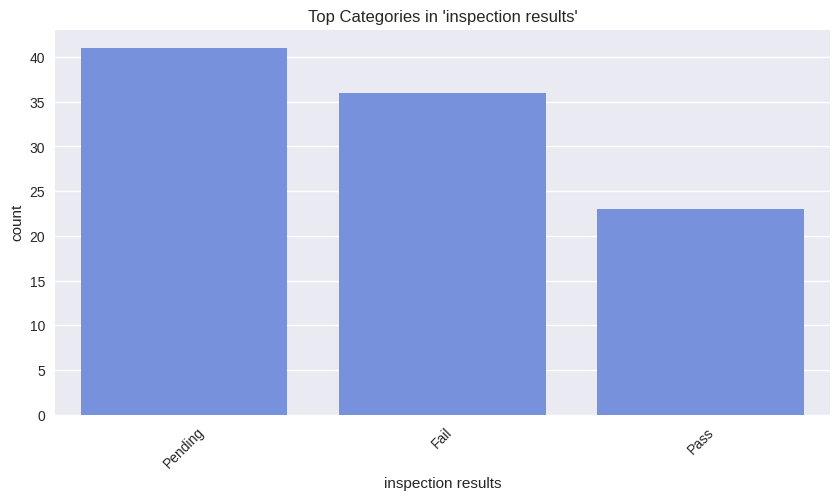

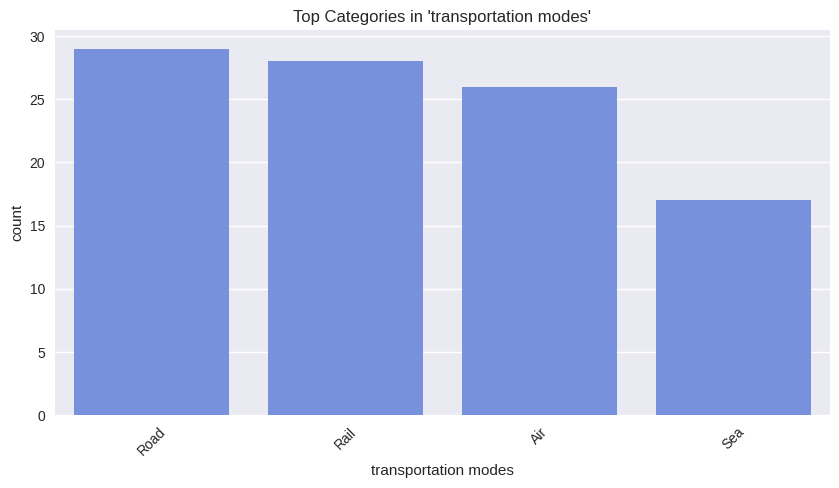

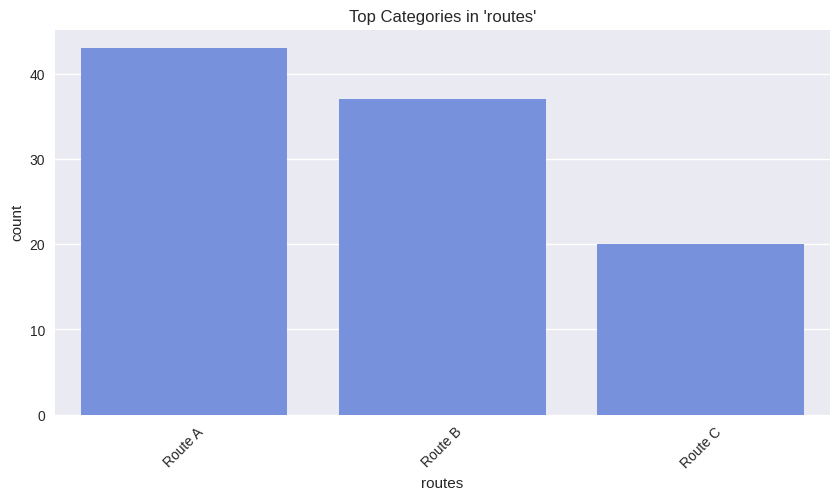

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top Categories in '{col}'")
    plt.xticks(rotation=45)
    plt.show()

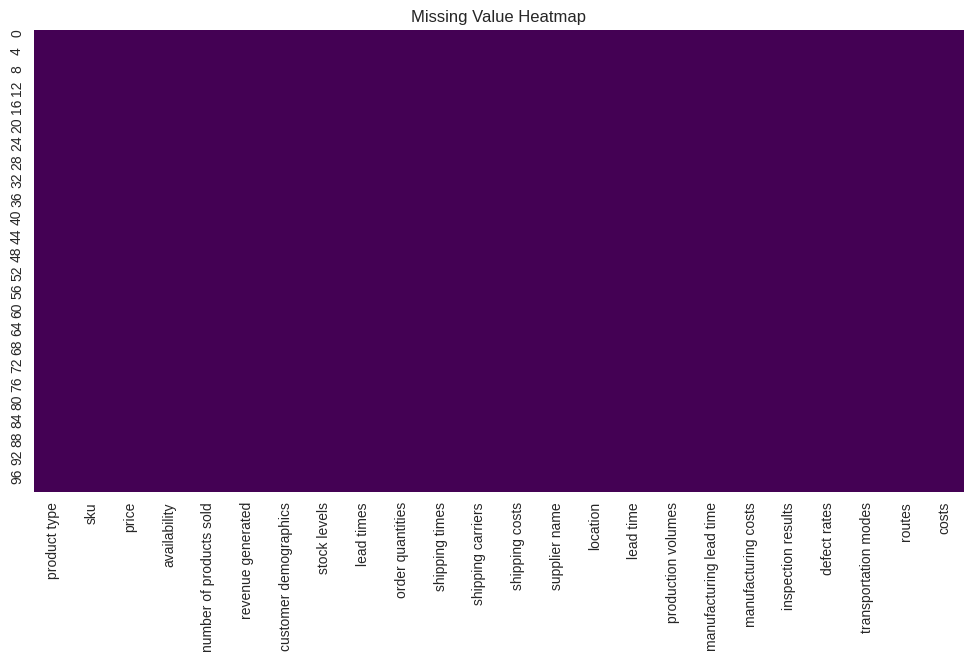

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

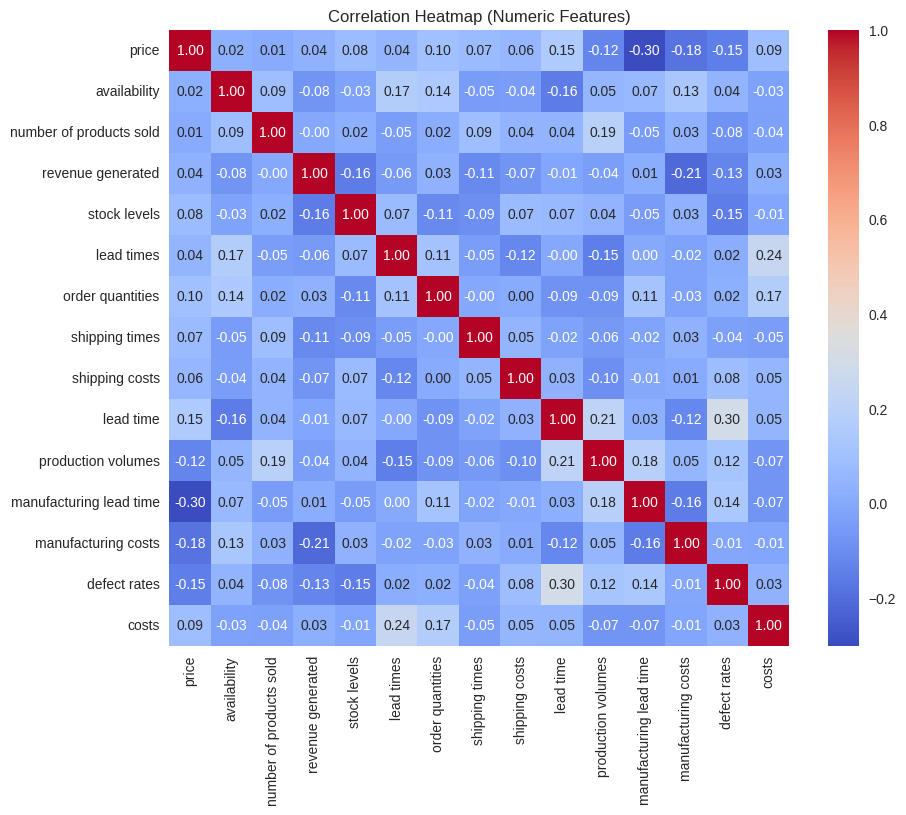

In [ ]:
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

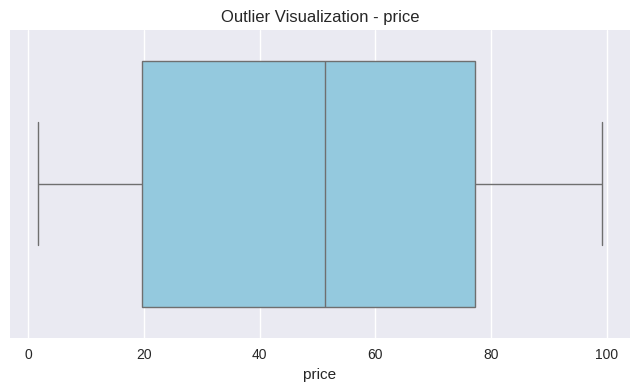

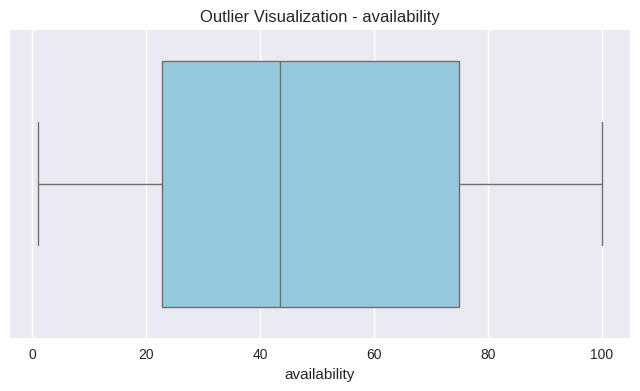

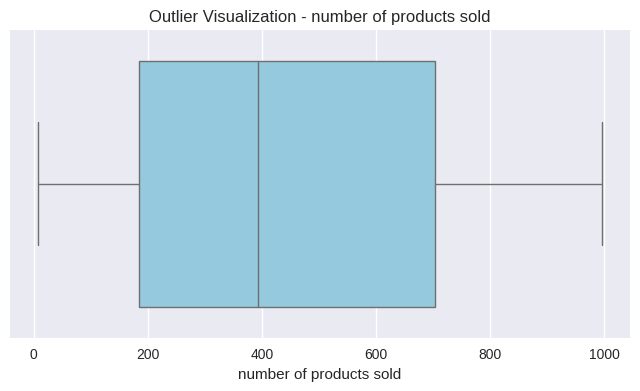

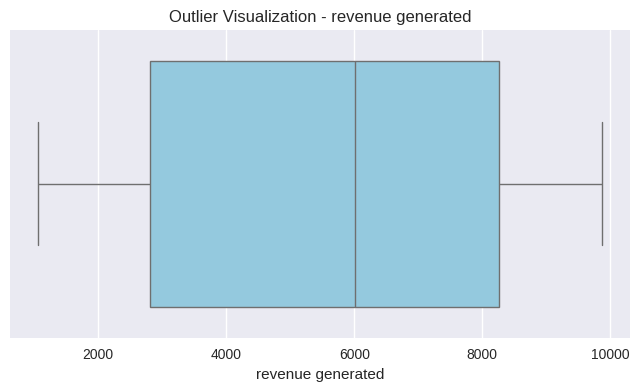

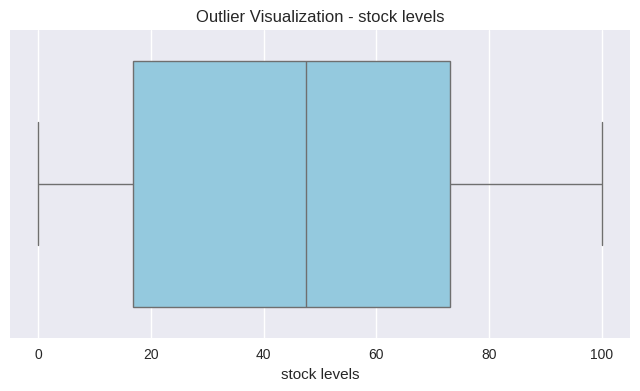

In [ ]:
for col in num_cols[:5]:  # limit to first 5 for clarity
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Outlier Visualization - {col}")
    plt.show()

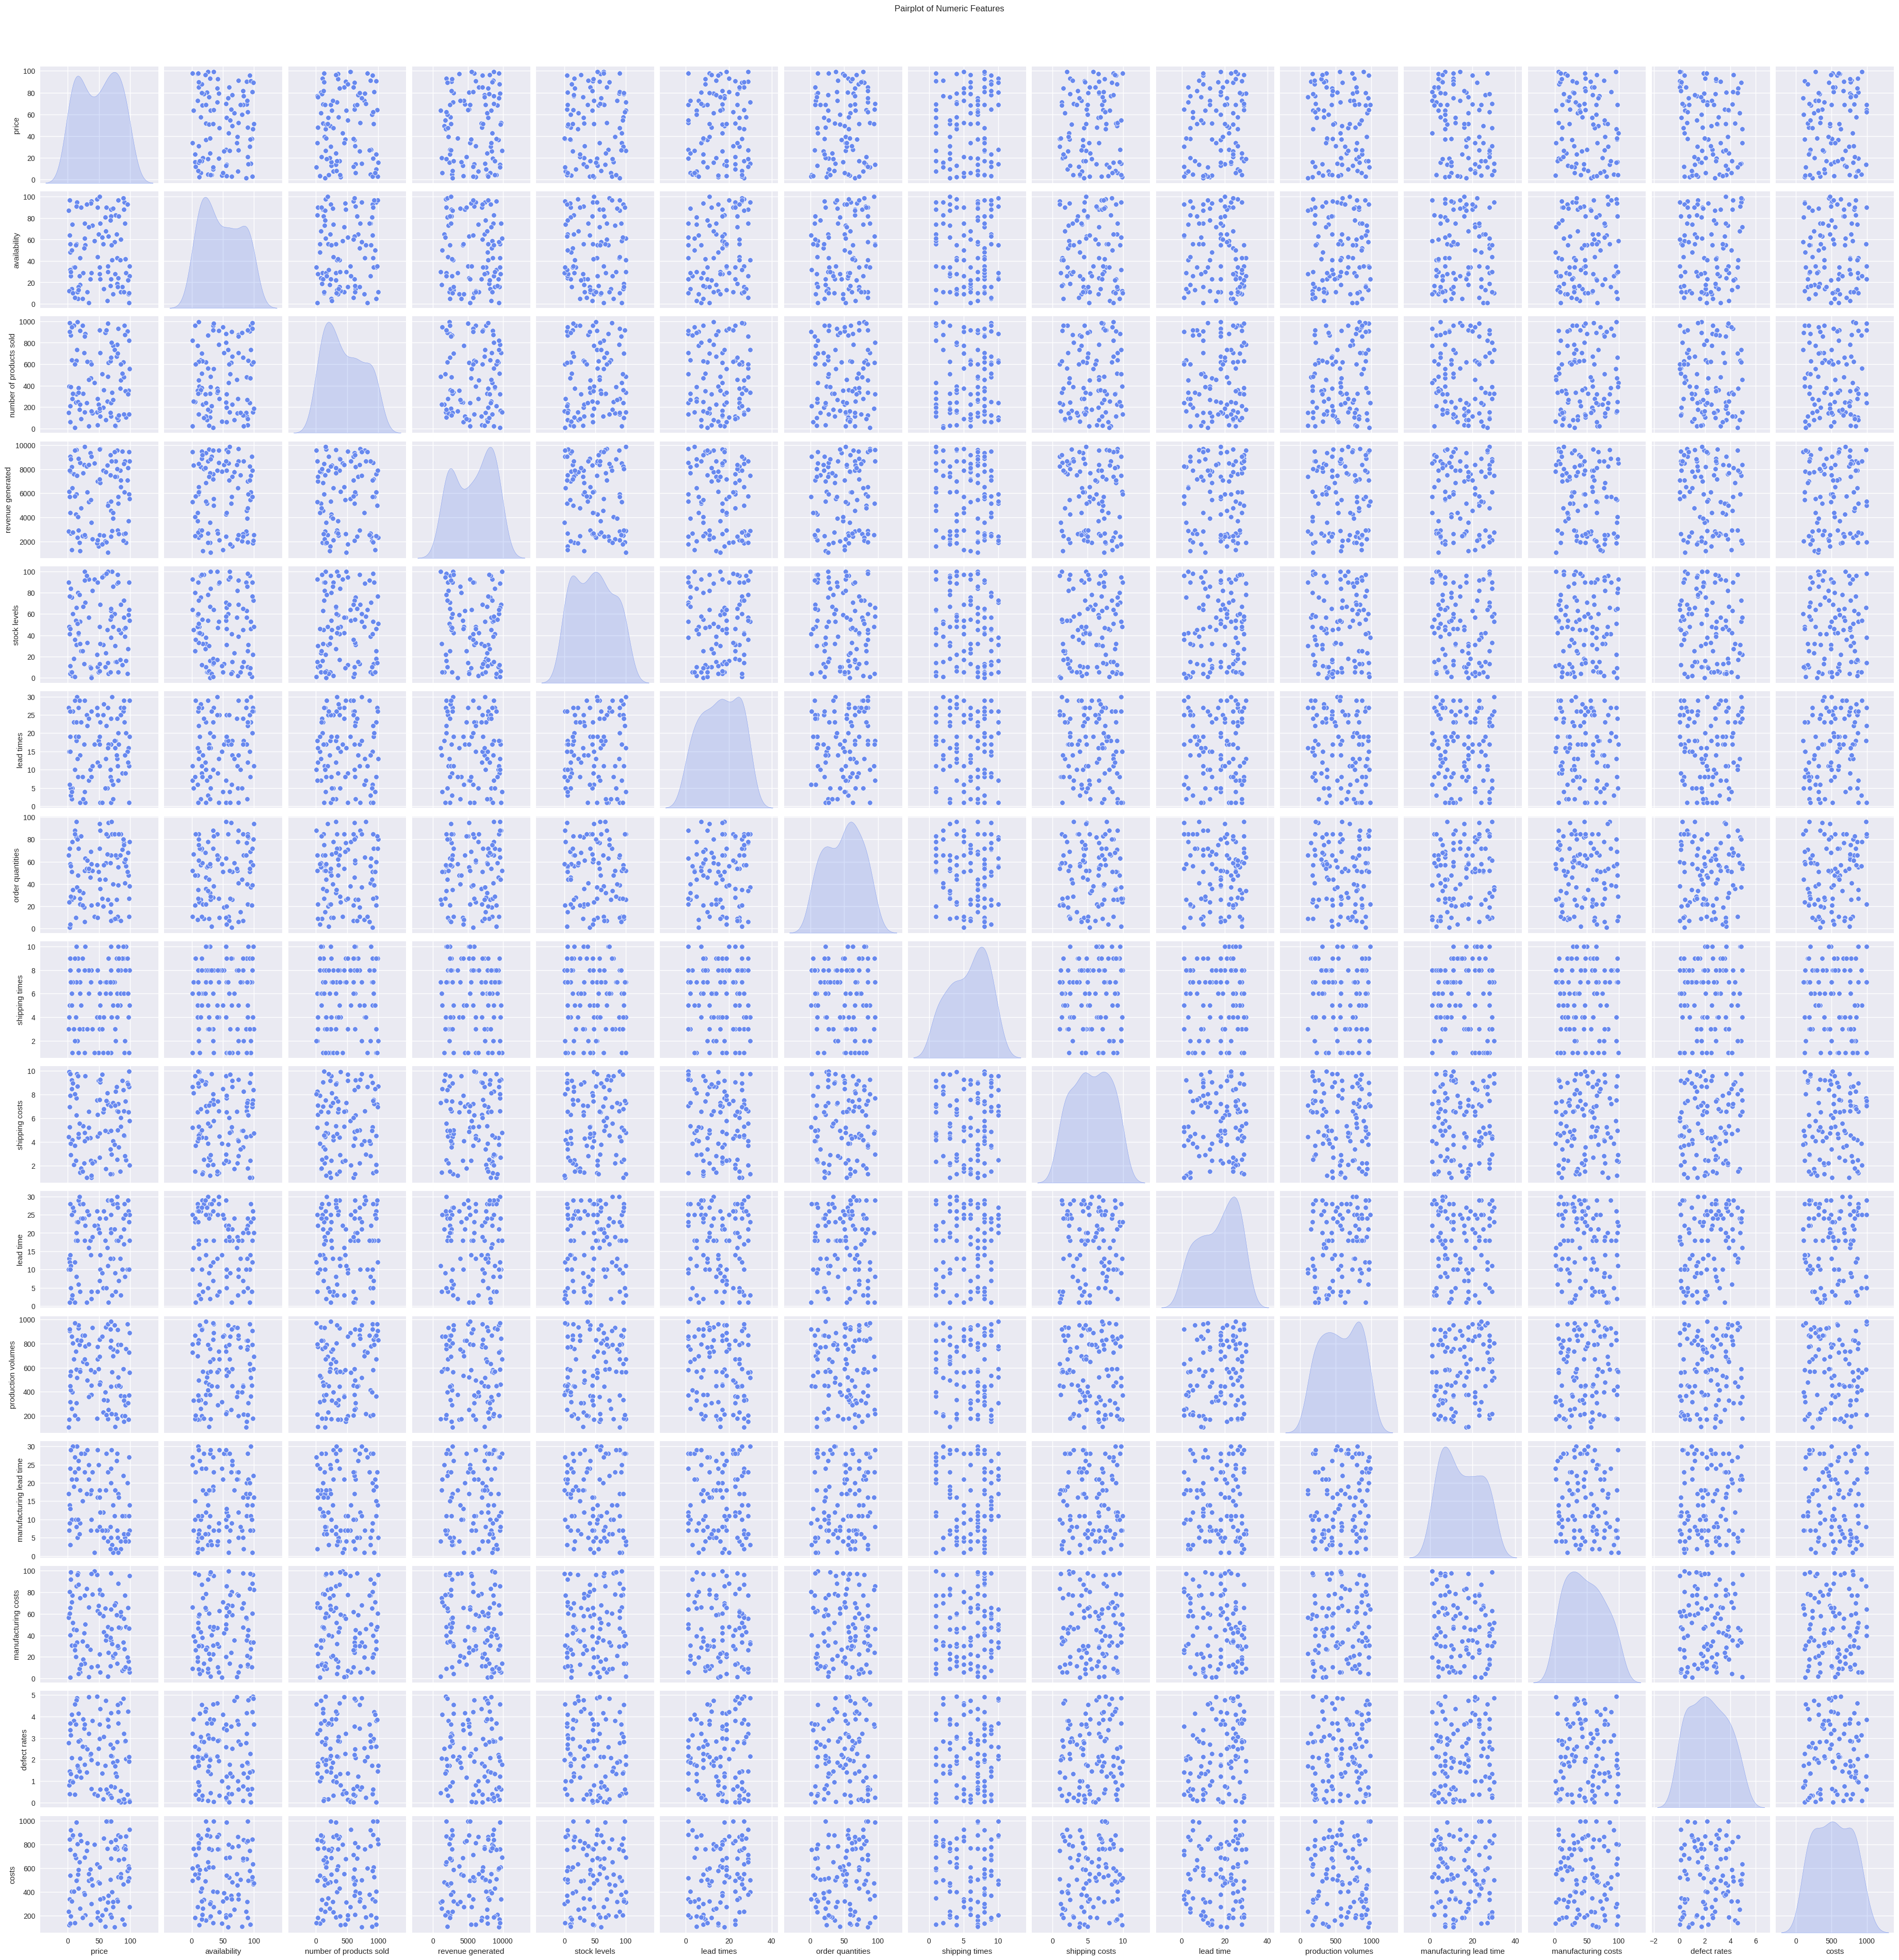

In [ ]:
sns.pairplot(df[num_cols].sample(min(200, len(df))), diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

In [ ]:
if {'sales', 'profit'}.issubset(df.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='sales', y='profit', hue='region', alpha=0.7)
    plt.title("Sales vs Profit by Region")
    plt.show()

In [ ]:
if {'product', 'sales'}.issubset(df.columns):
    top_products = df.groupby('product')['sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
    plt.title("Top 10 Products by Sales")
    plt.xlabel("Total Sales")
    plt.ylabel("Product")
    plt.show()

In [ ]:
print("Summary Statistics:")
display(df.describe(include='all'))

Summary Statistics:


,product type,sku,price,availability,number of products sold,revenue generated,customer demographics,stock levels,lead times,order quantities,...,location,lead time,production volumes,manufacturing lead time,manufacturing costs,inspection results,defect rates,transportation modes,routes,costs
count,100,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100.000000,100.000000,...,100,100.000000,100.000000,100.00000,100.000000,100,100.000000,100,100,100.000000
unique,3,100,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,3,NaN,4,3,NaN
top,skincare,SKU0,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,...,Kolkata,NaN,NaN,NaN,NaN,Pending,NaN,Road,Route A,NaN
freq,40,1,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,25,NaN,NaN,NaN,NaN,41,NaN,29,43,NaN
mean,NaN,NaN,49.462461,48.400000,460.990000,5776.048187,NaN,47.770000,15.960000,49.220000,...,NaN,17.080000,567.840000,14.77000,47.266693,NaN,2.277158,NaN,NaN,529.245782
std,NaN,NaN,31.168193,30.743317,303.780074,2732.841744,NaN,31.369372,8.785801,26.784429,...,NaN,8.846251,263.046861,8.91243,28.982841,NaN,1.461366,NaN,NaN,258.301696
min,NaN,NaN,1.699976,1.000000,8.000000,1061.618523,NaN,0.000000,1.000000,1.000000,...,NaN,1.000000,104.000000,1.00000,1.085069,NaN,0.018608,NaN,NaN,103.916248
25%,NaN,NaN,19.597823,22.750000,184.250000,2812.847151,NaN,16.750000,8.000000,26.000000,...,NaN,10.000000,352.000000,7.00000,22.983299,NaN,1.009650,NaN,NaN,318.778455
50%,NaN,NaN,51.239831,43.500000,392.500000,6006.352023,NaN,47.500000,17.000000,52.000000,...,NaN,18.000000,568.500000,14.00000,45.905622,NaN,2.141863,NaN,NaN,520.430444
75%,NaN,NaN,77.198228,75.000000,704.250000,8253.976921,NaN,73.000000,24.000000,71.250000,...,NaN,25.000000,797.000000,23.00000,68.621026,NaN,3.563995,NaN,NaN,763.078231


In [ ]:
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("\nTop correlated features:\n", top_corr.head(10))


Top correlated features:
 price                    price                      1.000000
defect rates             lead time                  0.297099
lead times               costs                      0.243686
production volumes       lead time                  0.212676
                         number of products sold    0.187945
manufacturing lead time  production volumes         0.184457
availability             lead times                 0.170439
costs                    order quantities           0.167306
price                    lead time                  0.152185
availability             order quantities           0.143769
dtype: float64


In [ ]:
from google.colab import files
files.download("supply_chain_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>